In [1]:
import numpy
import pandas
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold
from keras.constraints import maxnorm
#from sklearn.metrics import explained_variance_score
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


Using TensorFlow backend.


In [2]:
# load dataset
dataframe = pandas.read_csv("energyda.csv")

# Assign names to Columns
dataframe.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [3]:
print("Head:", dataframe.head())

Head:    relative_compactness  surface_area  wall_area  roof_area  overall_height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   orientation  glazing_area  glazing_area_distribution  heating_load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   cooling_load  
0         21.33  
1         21.33  
2         21.33  
3       

In [4]:
print("Statistical Description:", dataframe.describe())


Statistical Description:        relative_compactness  surface_area   wall_area   roof_area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       overall_height  orientation  glazing_area  glazing_area_distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000   

In [5]:

print("Shape:", dataframe.shape)


Shape: (768, 10)


In [6]:

print("Data Types:", dataframe.dtypes)


Data Types: relative_compactness         float64
surface_area                 float64
wall_area                    float64
roof_area                    float64
overall_height               float64
orientation                    int64
glazing_area                 float64
glazing_area_distribution      int64
heating_load                 float64
cooling_load                 float64
dtype: object


In [7]:

print("Correlation:", dataframe.corr(method='pearson'))

Correlation:                            relative_compactness  surface_area     wall_area  \
relative_compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
surface_area                      -9.919015e-01  1.000000e+00  1.955016e-01   
wall_area                         -2.037817e-01  1.955016e-01  1.000000e+00   
roof_area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
overall_height                     8.277473e-01 -8.581477e-01  2.809757e-01   
orientation                        0.000000e+00  0.000000e+00  0.000000e+00   
glazing_area                       1.283986e-17  1.318356e-16 -7.969726e-19   
glazing_area_distribution          1.764620e-17 -3.558613e-16  0.000000e+00   
heating_load                       6.222722e-01 -6.581202e-01  4.556712e-01   
cooling_load                       6.343391e-01 -6.729989e-01  4.271170e-01   

                              roof_area  overall_height  orientation  \
relative_compactness      -8.688234e-01    8.

'overall_height' has the highest correlation with 'heating_load' and 'cooling_load' (which is a positive correlation), followed by 'roof_area' for both outputs
 which is a negative correlation, 'orientation' has the least correlation 

In [8]:
dataset = dataframe.values


X = dataset[:,0:8]
Y = dataset[:,8]
Y2 = dataset[:,9]

In [9]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 



Number of Features:  3
Selected Features:  [False  True False  True  True False False False]
Feature Ranking:  [4 1 3 1 1 6 2 5]


'wall_area', 'roof_area' and 'overall_height' were top 3 selected features/feature combination for predicting 'heating_load'
 using Recursive Feature Elimination, the 2nd and 3rd selected features were atually among the attributes with the highest correlation with the  'heating_load'

In [10]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y2)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 


Number of Features:  3
Selected Features:  [ True False  True False  True False False False]
Feature Ranking:  [1 3 1 6 1 5 2 4]


'wall_area', 'glazing_area' and 'overall_height' were top 3 selected features/feature combination for predicting 'cooling_load'
using Recursive Feature Elimination

(array([ 20., 187., 153.,  39.,  39.,  59.,  83.,  83.,  59.,  46.]),
 array([ 6.01 ,  9.719, 13.428, 17.137, 20.846, 24.555, 28.264, 31.973,
        35.682, 39.391, 43.1  ]),
 <a list of 10 Patch objects>)

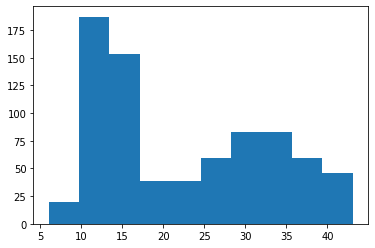

In [11]:
plt.hist((dataframe.heating_load))


(array([118., 204.,  61.,  29.,  73.,  94.,  98.,  56.,  21.,  14.]),
 array([10.9  , 14.613, 18.326, 22.039, 25.752, 29.465, 33.178, 36.891,
        40.604, 44.317, 48.03 ]),
 <a list of 10 Patch objects>)

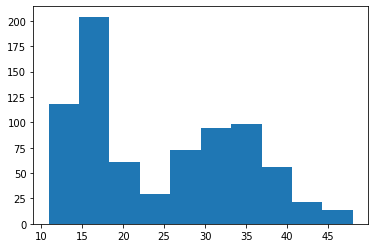

In [12]:
plt.hist((dataframe.cooling_load))

(array([118., 204.,  61.,  29.,  73.,  94.,  98.,  56.,  21.,  14.]),
 array([10.9  , 14.613, 18.326, 22.039, 25.752, 29.465, 33.178, 36.891,
        40.604, 44.317, 48.03 ]),
 <a list of 10 Patch objects>)

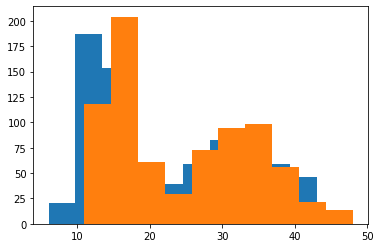

In [13]:
plt.hist((dataframe.heating_load))

plt.hist((dataframe.cooling_load))


Most of the dataset's samples fall between 10 and 20 of both 'heating_load' and 'cooling_load' regressional output classes, with a positive skew

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E287A97208>,
      dtype=object)

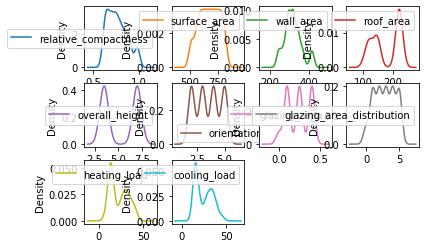

In [14]:
dataframe.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False)

Majority of the features have a positive skew except for a few, 'oreintation' and 'overall_height' have quite even distribution

relative_compactness            AxesSubplot(0.125,0.657941;0.168478x0.222059)
surface_area                 AxesSubplot(0.327174,0.657941;0.168478x0.222059)
wall_area                    AxesSubplot(0.529348,0.657941;0.168478x0.222059)
roof_area                    AxesSubplot(0.731522,0.657941;0.168478x0.222059)
overall_height                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
orientation                  AxesSubplot(0.327174,0.391471;0.168478x0.222059)
glazing_area                 AxesSubplot(0.529348,0.391471;0.168478x0.222059)
glazing_area_distribution    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
heating_load                       AxesSubplot(0.125,0.125;0.168478x0.222059)
cooling_load                    AxesSubplot(0.327174,0.125;0.168478x0.222059)
dtype: object

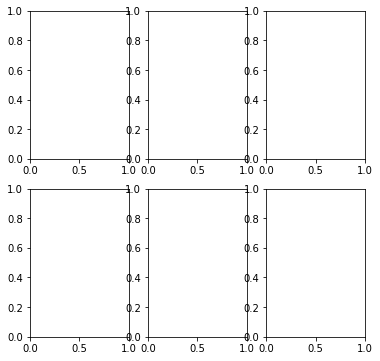

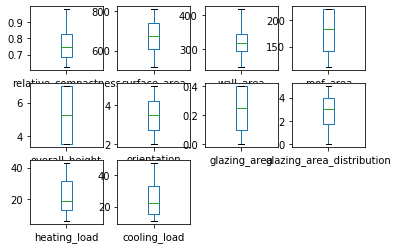

In [15]:
axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))
dataframe.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E28833D0C8>,
      dtype=object)

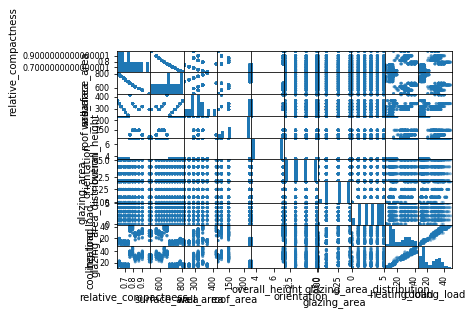

In [16]:
scatter_matrix(dataframe)

[Text(0, 0, 'relative_compactness'),
 Text(0, 0, 'surface_area'),
 Text(0, 0, 'wall_area'),
 Text(0, 0, 'roof_area'),
 Text(0, 0, 'overall_height'),
 Text(0, 0, 'orientation'),
 Text(0, 0, 'glazing_area'),
 Text(0, 0, 'glazing_area_distribution'),
 Text(0, 0, 'heating_load')]

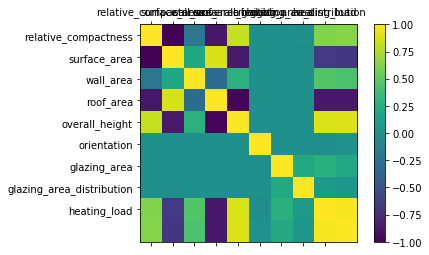

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns)
ax.set_yticklabels(dataframe.columns)

'overall_height' has the highest positive corelation as expected

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [19]:
from sklearn.model_selection import cross_val_score
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, Y, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LiR: 0.894147 (0.064789)
Ridge: 0.888898 (0.073554)
Lasso: 0.739750 (0.185156)
ElasticNet: 0.751113 (0.184069)


C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Bag_Re: 0.969167 (0.082450)


C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForest: 0.969185 (0.082574)


C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ExtraTreesRegressor: 0.969104 (0.082352)
KNN: 0.885004 (0.194983)
CART: 0.968717 (0.082255)


C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.683841 (0.133142)


[Text(0, 0, 'LiR'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'Lasso'),
 Text(0, 0, 'ElasticNet'),
 Text(0, 0, 'Bag_Re'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'ExtraTreesRegressor'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'SVM')]

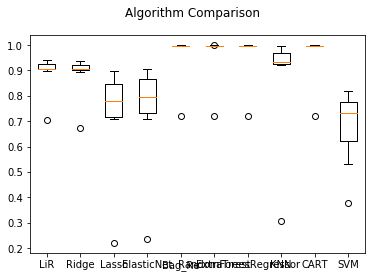

In [20]:
#boxplot algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

'ExtraTrees Regressor' and 'Random Forest' are the best estimators/models for 'heating_load'
 

In [21]:
# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y2)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, Y2, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    


C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_stat

LiR: 0.876461 (0.032728)
Ridge: 0.870432 (0.036123)
Lasso: 0.751754 (0.101792)
ElasticNet: 0.762353 (0.098235)
Bag_Re: 0.962673 (0.025359)


C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForest: 0.964445 (0.023486)


C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ExtraTreesRegressor: 0.950768 (0.021915)
KNN: 0.924107 (0.088863)
CART: 0.954942 (0.020943)


C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.703267 (0.079129)


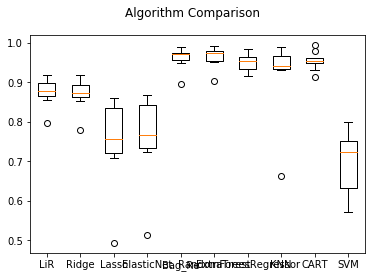

In [22]:
#boxplot algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


And 'Random Forest' and 'Bagging Regressor' are the best estimators/models for 'cooling_load', they can be further explored and their hyperparameters tuned

In [24]:
# Define 10-fold Cross Valdation Test Harness
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
for train ,test in kfold.split(X,Y,groups=None):

    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='relu'))

    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='sgd')

    # Fit the model
    model.fit(X[train], Y[train], epochs=300, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % ("score", 100-scores))
cvscores.append(100-scores)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, input_dim=8, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_constraint=<keras.con..., kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]


score: 91.22%
score: 76.78%
score: 91.05%
score: 90.99%
score: 90.76%
90.76% (+/- 0.00%)


In [25]:
# Define 10-fold Cross Valdation Test Harness
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y2):

    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    #model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='relu'))

    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='sgd')

    # Fit the model
    model.fit(X[train], Y2[train], epochs=300, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X[test], Y2[test], verbose=0)
    print("%s: %.2f%%" % ("score", 100-scores))
cvscores.append(100-scores)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, input_dim=8, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Arnav\Anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]


score: 91.45%
score: 91.44%
score: 75.51%
75.51% (+/- 0.00%)


In [27]:
cvscores

[75.51171827316284]